# Lyrics to genres multi-label classification

### Data loading and preparing

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [86]:
data = pd.read_csv(r"data_cleaned/final.csv")

In [87]:
data.head()

,genre,lyrics
0,new jack swing,"NA Yeah, Spyderman and Freeze in full effect U..."
1,neo soul,I really can't stay Baby it's cold outside I'v...
2,dance pop,Get up out of my business You don't keep me fr...
3,urban contemporary,"Hold your breath, don't look down, keep trying..."
4,new jack swing,All I want is somebody who's gonna love me for...


### Unique genre labels

In [88]:
unique_genres = set()

for row in data.genre:
    for item in row.split(","):
        unique_genres.add(item)

unique_genres = list(unique_genres)
print(len(unique_genres))
print(unique_genres)

99
['heavy metal', 'trance', 'soul music', 'trip-hop', 'downtempo', 'synthpop', 'rockabilly', 'psychedelic rock', 'neo soul', 'psychedelic', 'emo', 'lo-fi', 'screamo', 'alternative rock', 'progressive metal', 'instrumental', 'electro', 'soundtrack', 'rock', 'reggae', 'grunge', 'power metal', 'k-rock', 'soft rock', 'punk', 'pop', 'progressive rock', 'classical', 'j-rock', 'blues', 'indie rock', 'disco', 'folk', 'funk', 'dance pop', 'garage rock', 'metal', 'post-punk', 'pop rock', 'death metal', 'new jack swing', 'experimental', 'surf music', 'permanent wave', 'new wave', 'j-pop', 'edm', 'rap', 'power-pop', 'dream pop', 'black music', 'gothic metal', 'hardcore', 'metalcore', 'nu metal', 'folk rock', 'ambient', 'black metal', 'industrial', 'indie folk', 'gangster rap', 'jazz', 'symphonic metal', 'indie', 'dance', 'ska', 'shoegaze', 'post-rock', 'doom metal', 'urban contemporary', 'pop punk', 'singer-songwriter', 'r&b', 'hard rock', 'child music', 'gospel', 'indie pop', 'technopop', 'class

In [89]:
def get_new_genres(df):
    genres = dict()
    
    for row in df.genre:
        for item in row.split(","):
            if item in genres:
                genres[item] += 1
            else:
                genres[item] = 1
    
    return genres

### Dropping songs where length of lyrics is less than 50 words

In [90]:
data = data.drop(data[data["lyrics"].map(lambda x: len(x.split())) < 100].index)

### Number of genre occurances

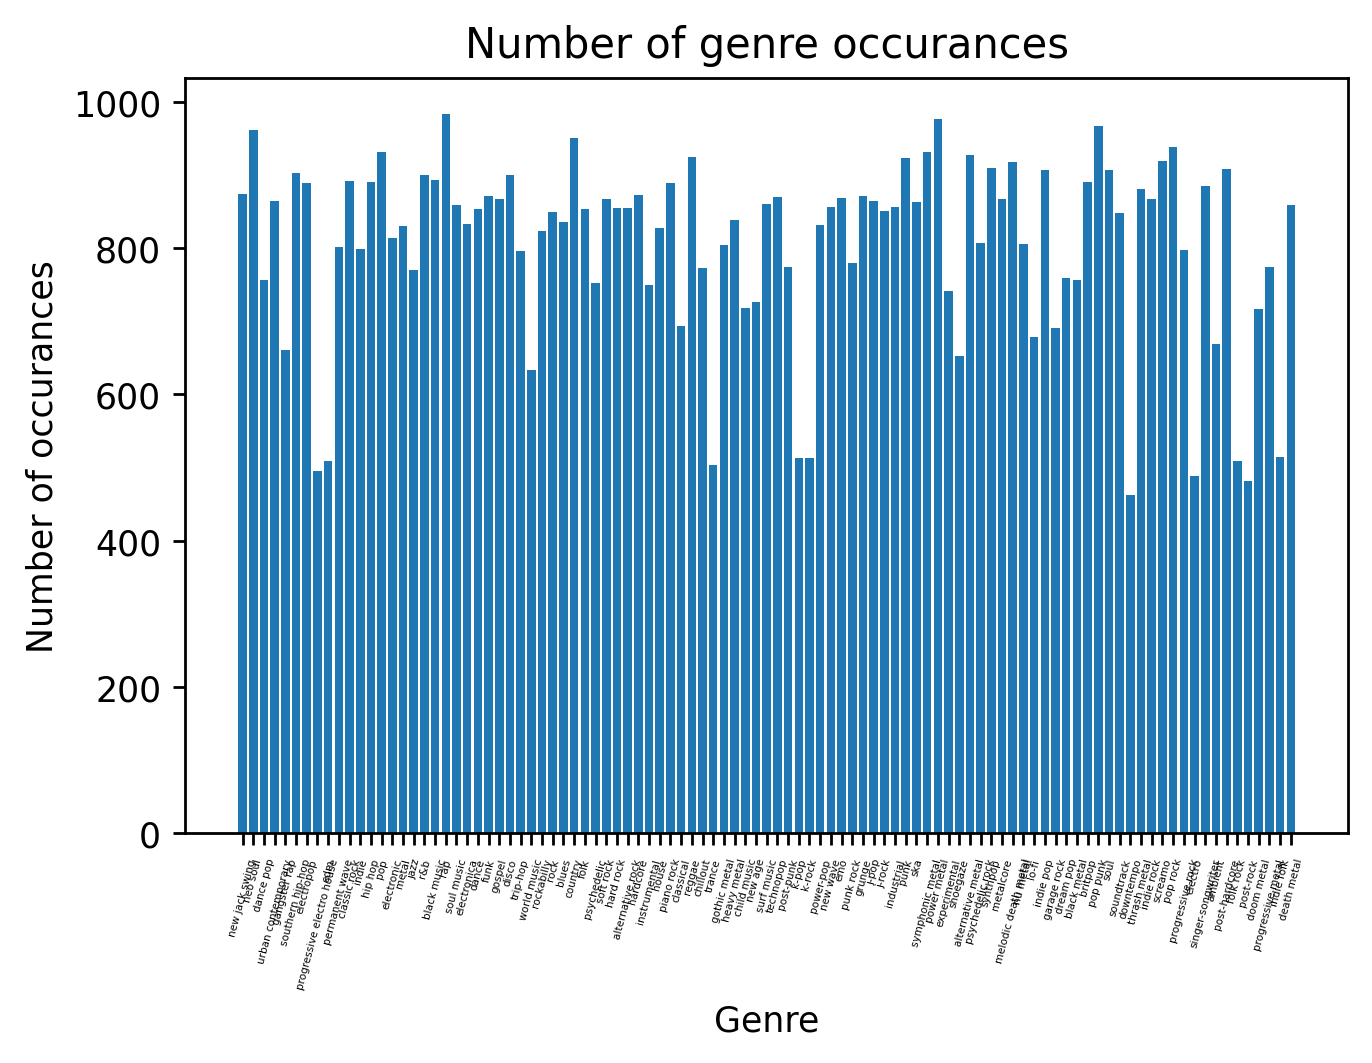

In [91]:
genres = get_new_genres(data)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel('Number of occurances')
plt.xlabel('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

### Creating vectors with encoded genre labels

In [113]:
def set_labels(x):
    labels = np.array([0 for i in range(len(unique_genres))])

    for item in x.split(","):
        labels[unique_genres.index(item)] = 1
    
    return np.array(labels)

In [114]:
data["genre"] = data["genre"].apply(lambda x: x.replace("\n"," "))
data["labels"] = data["genre"].apply(lambda x: set_labels(x))

In [115]:
data.head()

,genre,lyrics,labels
0,new jack swing,na yeah spyderman and freeze in full effect uh...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,neo soul,i really can not stay baby it is cold outside ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,dance pop,get up out of my business you do not keep me f...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,urban contemporary,hold your breath do not look down keep trying ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,new jack swing,all i want is somebody who is gonna love me fo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Clearing lyrics

In [95]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

def remove_punctuation(text): 
    text = re.sub(r'[?|!|\'|"|#]', r'',text)
    text = re.sub(r'[.|,|)|(|\|/]', r' ',text)
    text = text.strip()
    text = text.replace("\n"," ")
    return text

def remove_numbers(text):
    result = ""
    
    for word in text.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        result += alpha_word
        result += " "
    result = result.strip()
    
    return result

def ultimate_text_cleaning(text):
    text = clean_text(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [96]:
data["lyrics"] = data["lyrics"].apply(lambda x: ultimate_text_cleaning(x))

In [97]:
data.head()

,genre,lyrics,labels
0,new jack swing,na yeah spyderman and freeze in full effect uh...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,neo soul,i really can not stay baby it is cold outside ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,dance pop,get up out of my business you do not keep me f...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,urban contemporary,hold your breath do not look down keep trying ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,new jack swing,all i want is somebody who is gonna love me fo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [98]:
sample_lyrics = [i for i in data["lyrics"][:3]]
print(sample_lyrics)

['na yeah spyderman and freeze in full effect uh huh you ready ron i am ready you ready biv i am ready slick are you oh yeah break it down na girl i must i sense something strange in my mind situation is let is cure it cause we are running out of time it is oh so relationships they seem from the start it is all so when love is not together from the heart it is drivin me out of my mind that is why it is hard for me to find can not get it out of my head miss her kiss her love her that girl is never trust a big butt and smile that girl is na before i start to meet a fly girl you know cause in some you will think she is the best thing in the world she is so she will drive you right out of your mind and steal your heart when you are blind beware she is schemin she will make you think you are dreamin you will fall in love and you will be screamin demon hoo poison deadly movin in slow lookin for a mellow fellow like devoe gettin paid laid so better lay', 'i really can not stay baby it is cold

### Checkpoint

In [99]:
data.to_csv(r"data_cleaned/final_cleaned_labeled.csv", index=False)

In [100]:
data = pd.read_csv(r"data_cleaned/final_cleaned_labeled.csv")

### Splitting dataset to test and train 

In [190]:
x_train, x_test, y_train, y_test = train_test_split(data["lyrics"], data["labels"], test_size=0.1, shuffle=True)

In [191]:
y_train = np.stack(y_train.values)
y_test = np.stack(y_test.values)

In [192]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60088,)
(6677,)
(60088, 99)
(6677, 99)


### Tokenization

Check statistics for  maxlen

In [193]:
print(data["lyrics"].apply(len).mean())
print(data["lyrics"].apply(len).median())
print(data["lyrics"].apply(len).max())
print(data["lyrics"].apply(len).min())

881.337107766045
925.0
1799
171


In [194]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [195]:
max_words = 15_000
maxlen = 400

In [196]:
tokenizer = Tokenizer(lower=True, num_words=max_words)
tokenizer.fit_on_texts(list(x_train) + list(x_test))

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [186]:
y_train = np.asarray(y_train).reshape((-1, 1))
y_test = np.asarray(y_test).reshape((-1, 1))

Check shapes

In [197]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60088, 400)
(6677, 400)
(60088, 99)
(6677, 99)


### CNN with embedding model

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, MaxPooling1D, Activation, Dropout, Conv1D

In [226]:
filter_length = 100

num_classes = len(unique_genres)
print(num_classes)

99


In [220]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

In [222]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 400, 128)          2560000   
                                                                 
 conv1d_7 (Conv1D)           (None, 394, 32)           28704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 78, 32)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 72, 32)            7200      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 99)               

In [221]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["categorical_accuracy"])

### Train

In [238]:
batch_size = 64
epochs = 50

In [239]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
939/939 [==============================] - 91s 97ms/step - loss: 0.0613 - categorical_accuracy: 0.0333 - val_loss: 0.0611 - val_categorical_accuracy: 0.0368
Epoch 2/50
939/939 [==============================] - 100s 107ms/step - loss: 0.0591 - categorical_accuracy: 0.0514 - val_loss: 0.0603 - val_categorical_accuracy: 0.0427
Epoch 3/50
939/939 [==============================] - 102s 108ms/step - loss: 0.0571 - categorical_accuracy: 0.0755 - val_loss: 0.0601 - val_categorical_accuracy: 0.0556
Epoch 4/50
939/939 [==============================] - 94s 100ms/step - loss: 0.0548 - categorical_accuracy: 0.1054 - val_loss: 0.0604 - val_categorical_accuracy: 0.0554
Epoch 5/50
939/939 [==============================] - 102s 109ms/step - loss: 0.0520 - categorical_accuracy: 0.1448 - val_loss: 0.0616 - val_categorical_accuracy: 0.0580
Epoch 6/50
939/939 [==============================] - 94s 100ms/step - loss: 0.0487 - categorical_accuracy: 0.1984 - val_loss: 0.0632 - val_categorical_a

KeyboardInterrupt: 

### Check metrics history

In [ ]:
hist.history

{'loss': [0.13785748183727264,
  0.06410814076662064,
  0.06404061615467072,
  0.06393874436616898,
  0.06363218277692795],
 'categorical_accuracy': [0.008970176801085472,
  0.012082279659807682,
  0.014695113524794579,
  0.01634269766509533,
  0.0184063371270895],
 'val_loss': [0.06421022117137909,
  0.06419020891189575,
  0.06419210880994797,
  0.06411249190568924,
  0.06343831866979599],
 'val_categorical_accuracy': [0.011532125063240528,
  0.011082821525633335,
  0.013179571367800236,
  0.013179571367800236,
  0.01872098259627819]}

Loss

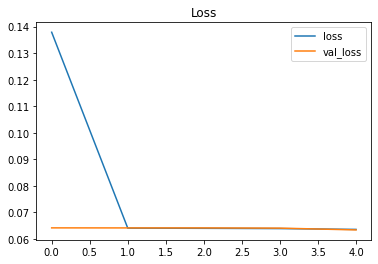

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Categorical accuracy

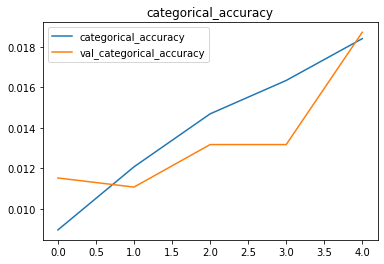

In [ ]:
plt.title('categorical_accuracy')
plt.plot(hist.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(hist.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Categorical accuracy")
plt.legend()
plt.show()

### Evaluate

In [ ]:
_, categorical_acc = model.evaluate(x_test)

### Test

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(np.argwhere(y_pred[0] > 0.5))
print(np.argwhere(y_test[0] == 1))

[[90]]
[[41]]


### Save/Load model

In [ ]:
model.save(r'models/model_cnn1.h5')


In [ ]:
new_model = tf.keras.models.load_model(r'models/model_cnn1.h5')
